In [1]:
from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras import initializers
from keras.optimizers import SGD, Adam
from keras.models import load_model
from tensorflow.examples.tutorials.mnist import input_data
import sklearn.utils
from matplotlib import pyplot as plt
import random
import numpy as np
import pandas as pd
from PIL import Image

%matplotlib inline

Using TensorFlow backend.
/Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Volumes/Data/ethan/

In [2]:
def build_model(weights_path=None, input_shape=(64, 64, 1), n_output=None):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(n_output))
    model.add(Activation('softmax'))

    optimizer = Adam(lr=1e-4)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

W0804 09:25:07.413424 4369786304 deprecation.py:323] From <ipython-input-3-71e12f4bac70>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0804 09:25:07.414530 4369786304 deprecation.py:323] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0804 09:25:07.416939 4369786304 deprecation.py:323] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0804 09:25:10.076422 4369786304 deprecation.py:323] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0804 09:25:10.079450 4369786304 deprecation.py:323] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0804 09:25:11.010452 4369786304 deprecation.py:323] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x, y = mnist.train.next_batch(60000)
x, y = sklearn.utils.shuffle(x, y, random_state=0)

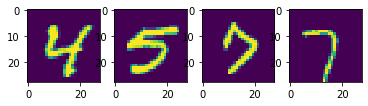

In [5]:
x = x.reshape((x.shape[0], 28, 28, 1))

fig, axes = plt.subplots(1, 4)
for i in range(4):
    img_index = int(random.random()*60000)
    axes[i].imshow(x[img_index, :, :, 0])

In [6]:
model = build_model(input_shape=(28, 28, 1), n_output=10)
model.fit(x, y, epochs=10, batch_size=128)

W0804 09:26:37.147674 4369786304 deprecation_wrapper.py:119] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 09:26:37.149281 4369786304 deprecation_wrapper.py:119] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 09:26:37.161182 4369786304 deprecation_wrapper.py:119] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 09:26:37.181298 4369786304 deprecation_wrapper.py:119] From /Volumes/Data/ethan/.env_tf110_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.

Epoch 1/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.9629 - acc: 0.7094
Epoch 2/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.4331 - acc: 0.8712
Epoch 3/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.3429 - acc: 0.8981
Epoch 4/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2919 - acc: 0.9137
Epoch 5/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.2570 - acc: 0.9227
Epoch 6/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.2306 - acc: 0.9316
Epoch 7/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.2119 - acc: 0.9372
Epoch 8/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.1934 - acc: 0.9419
Epoch 9/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.1842 - acc: 0.9453
Epoch 10/10
60000/60000 [==============================] - 18s 292us/step - loss: 

In [7]:
model.save("mnist_cnn.h5")

In [8]:
x_test, y_test = mnist.test.next_batch(10000)
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [9]:
def array_to_sprite_atlas(image_array, num_sprites_x, num_sprites_y):
    "Takes an array of images of shape (num_images, img_width, img_height) and splices them together to form a big ass mosaic (sprite atlas)."
    # Mnist arrays are in 0-1 range, PIL needs 0-255
    image_array = image_array * 255
    image_width, image_height = image_array.shape[1], image_array.shape[2]
    atlas_width  = num_sprites_x * image_width
    atlas_height = num_sprites_y * image_height
    # We paste the samples to get indices arranged in the following way:
    # | 0 | 1 | 2 | 3 |
    # | 4 | 5 | 6 | 7 |
    atlas  = Image.new("RGB", (atlas_width, atlas_height), (0, 0, 0))
    for i in range(num_sprites_y): 
        for j in range(num_sprites_x):
            sample = image_array[num_sprites_x * i + j, :, :]
            image = Image.fromarray(sample)
            atlas.paste(image, (j*image_width, i*image_height))
    return atlas

In [10]:
atlas = array_to_sprite_atlas(x_test.reshape(x_test.shape[0], 28, 28), 100, 100)
atlas.save("atlas.jpg", "JPEG")

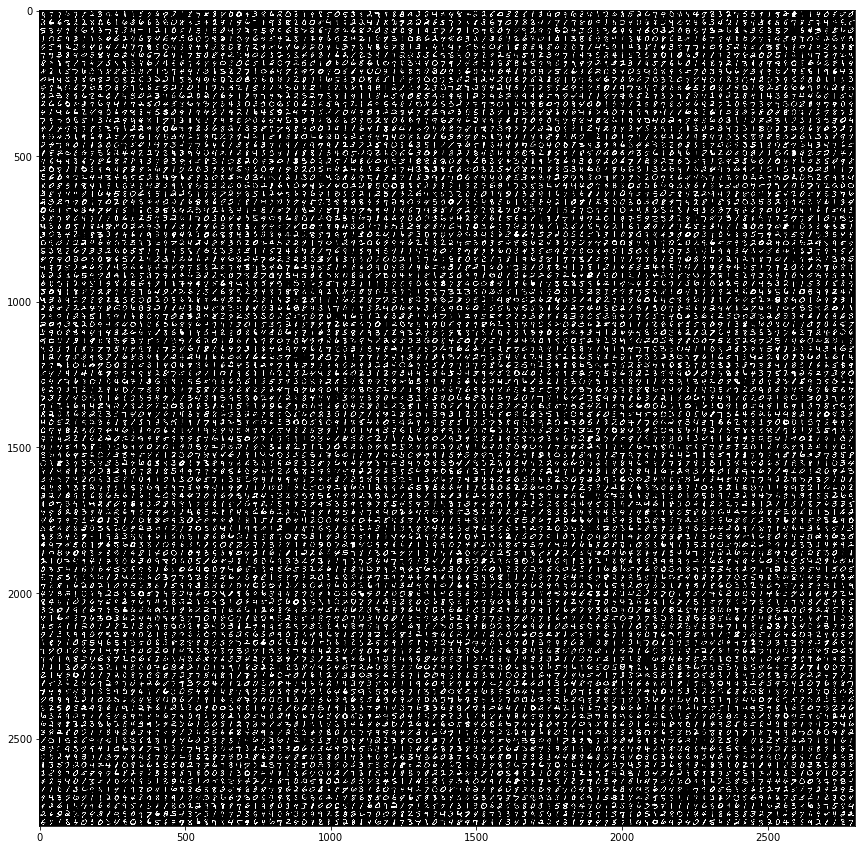

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(atlas)

In [12]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1) # Reverse one hot
y_test = np.argmax(y_test, axis=1)

In [14]:
df = pd.DataFrame({"prediction": predictions, "actual": y_test})
jsonstr = df.to_json(orient='records')

In [17]:
# Display the Dive visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive id="fd" height="800" sprite-image-width="28" sprite-image-height="28" atlas-url="atlas.jpg" ></facets-dive>
        <script>
          var data = {jsonstr};
          var fd = document.querySelector("#fd");
          fd.data = data;
        </script>
        <style>.container {{ width:100% !important; }}</style>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))